In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.legend_handler
import scipy
from scipy.integrate import solve_ivp

In [2]:
# Create the initial table provided:
#Air Transportation = P1
# Created these column-wise becasue its the only way I know to concatenate easily, do not use the P's for anything
P1 = np.array([[0,0,.002,.006,.005,.001,.003,.008,.002,.005,0]]) 
P1 = P1.T
# Electricity (P2)
P2 = np.array([[.134,0,.109,.083,.05,.233,.1,.5,.03,.03,0]])
P2 = P2.T
# Wireless Telecomms (P3)
P3 = np.array([[.308,.01,0,.013,.009,.104,.03,.1,.009,.02,0]])
P3 = P3.T
# Wired Telecomms (P4)
P4 = np.array([[.456,.023,.12,0,.02,.109,.1,.05,.005,.02,0]])
P4 = P4.T
# Water Management (P5)
P5 = np.array([[.033,.001,.002,.004,0,.005,.007,.05,.005,.03,0]])
P5 = P5.T
# Rail Transport (P6)
P6 = np.array([[.024,.003,.005,.003,.005,0,.003,.02,0,.03,0]])
P6 = P6.T
# Finance (P7)
P7 = np.array([[.012,0,.002,.004,.008,.007,0,.02,.002,.02,0]])
P7 = P7.T
# Fuel and Petroleum Grid (P8)
P8 = np.array([[.024,.002,.002,.001,.008,.006,.003,0,.005,.01,0]])
P8 = P8.T
# Natural Gas (P9)
P9 = np.array([[.007,.178,.004,.004,.008,.001,.007,0,0,.02,0]])
P9 = P9.T
# Naval Ports (P10)
P10 = np.array([[.001,.008,.002,.002,.005,.002,.003,.02,.005,0,0]])
P10 = P10.T
# Satellite Communications and Navigations (P11)
P11 = np.array([[.310,.004,.007,.005,.02,.004,.008,.008,.005,.005,0,]])
P11 = P11.T

T_1 = np.concatenate((P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11),axis=1)

print("Table 1", T_1)
colSums = np.sum(T_1, axis = 0)
print(colSums)

Table 1 [[0.    0.134 0.308 0.456 0.033 0.024 0.012 0.024 0.007 0.001 0.31 ]
 [0.    0.    0.01  0.023 0.001 0.003 0.    0.002 0.178 0.008 0.004]
 [0.002 0.109 0.    0.12  0.002 0.005 0.002 0.002 0.004 0.002 0.007]
 [0.006 0.083 0.013 0.    0.004 0.003 0.004 0.001 0.004 0.002 0.005]
 [0.005 0.05  0.009 0.02  0.    0.005 0.008 0.008 0.008 0.005 0.02 ]
 [0.001 0.233 0.104 0.109 0.005 0.    0.007 0.006 0.001 0.002 0.004]
 [0.003 0.1   0.03  0.1   0.007 0.003 0.    0.003 0.007 0.003 0.008]
 [0.008 0.5   0.1   0.05  0.05  0.02  0.02  0.    0.    0.02  0.008]
 [0.002 0.03  0.009 0.005 0.005 0.    0.002 0.005 0.    0.005 0.005]
 [0.005 0.03  0.02  0.02  0.03  0.03  0.02  0.01  0.02  0.    0.005]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]]
[0.032 1.269 0.603 0.903 0.137 0.093 0.075 0.061 0.229 0.048 0.376]


In [3]:
#Determine the A matrix
# a_ij = xij/xj



# Take a specific value in table 1 
#A = T_1.copy()
#columns = 11
#rows = 11
# Across the columns, look at each value 
#for j in range(columns):
#    for i in range(rows):
        #If the sum is non-zero we can divide, if it is zero we just assume the value is zero
#        if np.sum(T_1[i,:]) == 0:
#            A[i,j] = 0
#        else:
            # This is the normalization, the value in table one divided by the sum of that column
#            A[i,j] = T_1[i,j]/colSums[j]
            #print("Col Sums = ", colSums[j])
        
        
#print("A=", A)




In [4]:
# Calculate kappa, row summation of table 1: 
#k1 = np.sum(P1)
#print(k1)

# Given equation, still unsure what the (1/(n-1)) should be though
k_sum = np.sum(T_1, axis = 1)
ki = (1/(11-1))*k_sum


ki = ki.reshape(11,1)
print("k_i=", ki)


k_i= [[0.1309]
 [0.0229]
 [0.0255]
 [0.0125]
 [0.0138]
 [0.0472]
 [0.0264]
 [0.0776]
 [0.0068]
 [0.019 ]
 [0.    ]]


In [5]:
#Calculate lambda, column summation:

lambda_sum = np.sum(T_1, axis = 0)
print("lambdaSum", lambda_sum)
lambdaj = (1/(11-1))*lambda_sum

lambdaj = lambdaj.reshape(11,1)
print("lambda_j=", lambdaj)

lambdaSum [0.032 1.269 0.603 0.903 0.137 0.093 0.075 0.061 0.229 0.048 0.376]
lambda_j= [[0.0032]
 [0.1269]
 [0.0603]
 [0.0903]
 [0.0137]
 [0.0093]
 [0.0075]
 [0.0061]
 [0.0229]
 [0.0048]
 [0.0376]]


In [6]:
# Matrix S:
eye = np.identity(11)
#print("Identity=", eye)
#print("A Matrix=", T_1)
test = eye - T_1
#print("Pre-Inverse", test)
S = np.linalg.inv(test)
print("S=", S)


S= [[1.00432399e+00 2.37658587e-01 3.25415804e-01 5.09710217e-01
  3.80922952e-02 2.89133004e-02 1.60003339e-02 2.65887201e-02
  5.32330560e-02 5.67007349e-03 3.18630262e-01]
 [6.38348157e-04 1.01204742e+00 1.32038313e-02 2.69119803e-02
  2.52456936e-03 3.55077663e-03 7.93720786e-04 3.13087286e-03
  1.80521967e-01 9.16458214e-03 5.51758830e-03]
 [2.88980951e-03 1.24509754e-01 1.00509468e+00 1.26131134e-01
  3.15768057e-03 6.02936231e-03 2.79409896e-03 2.69351411e-03
  2.68284308e-02 3.48566133e-03 9.34294082e-03]
 [6.18984250e-03 8.93410431e-02 1.68574256e-02 1.00806692e+00
  4.67621285e-03 3.68129309e-03 4.33416557e-03 1.57186883e-03
  2.01760987e-02 2.94683089e-03 7.70566426e-03]
 [5.36725575e-03 6.18072721e-02 1.36523855e-02 2.76672352e-02
  1.00116665e+00 5.84454348e-03 8.57995800e-03 8.53346308e-03
  1.93976488e-02 5.89338437e-03 2.24550549e-02]
 [2.25261110e-03 2.63229510e-01 1.10838868e-01 1.31285956e-01
  6.91525949e-03 1.00214881e+00 8.18971671e-03 7.32201880e-03
  4.90548691e

In [7]:
# 2.10 calculate kappa bar and lambda bar:
# axis = 1 is a column-wise, axis = 0 is a row-wise operation
#From the given equation, 
kBar_sum = np.sum(S, axis = 0)
kBari = (1/(11-1))*kBar_sum

kBari = kBari.reshape(11,1)
print("kBar_i=", kBari)

lambdaBar_sum = np.sum(S, axis = 1)
lambdaBarj = (1/(11-1))*lambdaBar_sum

lambdaBarj = lambdaBarj.reshape(11,1)
print("lambdaBar_j=", lambdaBarj)


kBar_i= [[0.10428683]
 [0.25329822]
 [0.16741528]
 [0.20700626]
 [0.11550151]
 [0.11097755]
 [0.10870165]
 [0.10729262]
 [0.15124882]
 [0.10690718]
 [0.14132172]]
lambdaBar_j= [[0.25642366]
 [0.12580057]
 [0.13129571]
 [0.11655474]
 [0.11803648]
 [0.15940102]
 [0.13278523]
 [0.19896777]
 [0.1090302 ]
 [0.12566226]
 [0.1       ]]


In [8]:
# 2.13 - Sudden Snow Storm
# External Reductions: 50% Rail Transport, 10% Electricity, 35% Air Transport, 20% Naval port operations
# The snow storm impacts is represented by the f row vector
# 0 represents an operating system, 1 is a totally destroyed system 
f = np.array([[.35,.1,0,0,0,.5,0,0,0,.2,0]])
#Transpose it to be operatable for the dot product
f = f.T
print(f)


[[0.35]
 [0.1 ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.5 ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.2 ]
 [0.  ]]


In [9]:
# 2.13 Solve the equation x = Sf
snowStorm = np.dot(S,f)

print("Snow Storm Impacts =", snowStorm)

Snow Storm Impacts = [[0.39086992]
 [0.10503647]
 [0.01717422]
 [0.01353056]
 [0.01216022]
 [0.52919527]
 [0.01614885]
 [0.0740168 ]
 [0.00573393]
 [0.22313803]
 [0.        ]]


In [10]:
# An attempt at 2.15
# x(k) = Sum[i=0 to i=k]((A^i)*f)
A=T_1
kth = 11
eResults = []
# Trying to run a for loop where I run the given formula from the slides and place the outputs into one big matrix
for i in range(kth):     
    #This is the equation from class: x(k) = Sum[i=0 to i=k]((A^i)*f)
    x_k = np.dot(A**i, f)
    # print("x_k =",x_k)
    
    # Take the sum, column-wise
    xSum = np.sum(x_k, axis = 1)
    #xSum = xSum.reshape((11,))
    np.shape(xSum)
    #Place the vectors into the empty matrix
    eResults.append(xSum)
eResults = np.array(eResults)#.T?

print("Results=",eResults)
print(np.shape(eResults))



Results= [[1.15000000e+00 1.15000000e+00 1.15000000e+00 1.15000000e+00
  1.15000000e+00 1.15000000e+00 1.15000000e+00 1.15000000e+00
  1.15000000e+00 1.15000000e+00 1.15000000e+00]
 [2.56000000e-02 3.10000000e-03 1.45000000e-02 1.23000000e-02
  1.02500000e-02 2.40500000e-02 1.31500000e-02 6.68000000e-02
  4.70000000e-03 1.97500000e-02 0.00000000e+00]
 [2.08380000e-03 1.73000000e-05 1.20280000e-03 7.06800000e-04
  2.76250000e-04 5.43005000e-03 1.00945000e-03 2.53024000e-02
  9.64000000e-05 5.48750000e-04 0.00000000e+00]
 [2.47522600e-04 1.15900000e-07 1.29569800e-04 5.72694000e-05
  1.26312500e-05 1.26493565e-03 1.00028350e-04 1.25057792e-02
  2.72780000e-06 1.62437500e-05 0.00000000e+00]
 [3.24076818e-05 8.59700000e-10 1.41161374e-05 4.74632940e-06
  6.25656250e-07 2.94729556e-04 1.00000851e-05 6.25011343e-03
  8.11306000e-08 4.86218750e-07 0.00000000e+00]
 [4.32438165e-06 6.67510000e-12 1.53862553e-06 3.93906914e-07
  3.12532813e-08 6.86719856e-05 1.00000026e-06 3.12500225e-03
  2.430

range(0, 11)


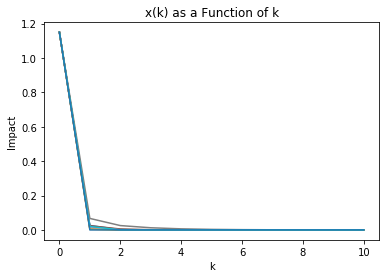

In [11]:
rows = range(eResults.shape[0])
print(rows)
# This is a mess, not sure how to go about this yet
for i in range(eResults.shape[1]):
    plt.plot(rows, eResults[:,i])
    #print("Y Vals", eResults[:,i])
plt.title('x(k) as a Function of k');
plt.xlabel('k');
plt.ylabel('Impact');

In [12]:
# 2.12 New S Matrix
# New P2

P2new = P2+(P2*0.1)

#10% increase to the electricity sector
print("New Electricity Sector =",P2new)
T_1new = np.concatenate((P1,P2new,P3,P4,P5,P6,P7,P8,P9,P10,P11),axis=1)

eye = np.identity(11)
#print("Identity=", eye)
#print("A Matrix=", T_1)
test = eye - T_1new
#print("Pre-Inverse", test)
S_new = np.linalg.inv(test)
print("S_new=", S_new)


New Electricity Sector = [[0.1474]
 [0.    ]
 [0.1199]
 [0.0913]
 [0.055 ]
 [0.2563]
 [0.11  ]
 [0.55  ]
 [0.033 ]
 [0.033 ]
 [0.    ]]
S_new= [[1.00433918e+00 2.61739775e-01 3.25729983e-01 5.10350575e-01
  3.81523662e-02 2.89977894e-02 1.60192201e-02 2.66632177e-02
  5.75284905e-02 5.88814037e-03 3.18761550e-01]
 [6.39118129e-04 1.01326814e+00 1.32197577e-02 2.69444414e-02
  2.52761448e-03 3.55505956e-03 7.94678168e-04 3.13464930e-03
  1.80739711e-01 9.17563641e-03 5.52424358e-03]
 [2.89776715e-03 1.37125931e-01 1.00525928e+00 1.26466619e-01
  3.18915183e-03 6.07362627e-03 2.80399348e-03 2.73254355e-03
  2.90788165e-02 3.59990695e-03 9.41172304e-03]
 [6.19555245e-03 9.83936863e-02 1.69755323e-02 1.00830764e+00
  4.69879482e-03 3.71305436e-03 4.34126531e-03 1.59987412e-03
  2.17908461e-02 3.02880698e-03 7.75501843e-03]
 [5.37120597e-03 6.80700060e-02 1.37340932e-02 2.78337714e-02
  1.00118227e+00 5.86651634e-03 8.58486969e-03 8.55283749e-03
  2.05147517e-02 5.95009647e-03 2.24891987e-0

In [13]:
# New k and lambda bar


kBar_sum2 = np.sum(S_new, axis = 0)
kBari2 = (1/(11-1))*kBar_sum2

kBari2 = kBari2.reshape(11,1)
print("kBar_i2=", kBari2)

lambdaBar_sum2 = np.sum(S_new, axis = 1)
lambdaBarj2 = (1/(11-1))*lambdaBar_sum2

lambdaBarj2 = lambdaBarj2.reshape(11,1)
print("lambdaBar_j2=", lambdaBarj2)

kBar_i2= [[0.10429663]
 [0.26883144]
 [0.16761794]
 [0.20741931]
 [0.11554026]
 [0.11103205]
 [0.10871383]
 [0.10734067]
 [0.15401953]
 [0.10704784]
 [0.14140641]]
lambdaBar_j2= [[0.25941703]
 [0.12595231]
 [0.13286394]
 [0.11768001]
 [0.11881496]
 [0.16271645]
 [0.13426936]
 [0.20572682]
 [0.1094824 ]
 [0.12634264]
 [0.1       ]]


### Q 2.16

In [14]:
def calculate_x_uncertain_A(scaling_factor):
# # creat empty matirx g that will be used to store the g vector in each realization of mc
    n_sample=10000  # number of samples from the uniform distribution of each x
    mat_A=T_1

    # Matrix S:
    eye = np.identity(mat_A.shape[0])

    # initialize matrix A and x
    mat_A_mc=np.zeros((mat_A.shape[0],n_sample))
    x_mc=np.zeros((mat_A.shape[0],n_sample))


    for i_sample in range(n_sample):

        # draw a sample of matrix A
        mat_A_rand=np.zeros((mat_A.shape[0],mat_A.shape[1]))
        for i in range(mat_A.shape[0]):
            for j in range(mat_A.shape[1]):
                mean=mat_A[i][j]
                low=(1-scaling_factor)*mean
                high=(1+scaling_factor)*mean
                mat_A_rand[i][j]=np.random.uniform(low,high,1)

        # solve for matrix s
        test_mc = eye - mat_A_rand
        S_mc = np.linalg.inv(test_mc)

        # compute x
        x_mc[:,[i_sample]] = np.matmul(S_mc,f)
    return x_mc

In [15]:
# box plot of x to show the range of x_mc
s0=0
s1=0.1
x_A_s0=calculate_x_uncertain_A(s0)
x_A_s1=calculate_x_uncertain_A(s1)

Historgram of $x$

In [16]:
# for count_plot in range(mat_A.shape[0]):     
#     plt.hist(x_A_s1[count_plot,:])
# #     plt.plot(x_A_s0[count_plot,:])
# #     print('Infrastructure number: %s'%(count_plot+1))
#     plt.xlabel("Infrastructure %s"%(count_plot+1),fontweight='bold',fontsize=12)
#     plt.ylabel("Frequency",fontweight='bold',fontsize=12)
#     plt.show()

In [ ]:
#### Note: use the commented figure paramters for the figure below

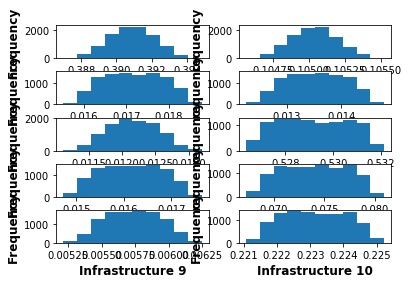

In [17]:
# # figure parameters
# import matplotlib.pylab as pylab
# params = {'legend.fontsize': 'x-large',
#           'figure.figsize': (14, 14),
#          'axes.labelsize': 'x-large',
#          'axes.titlesize':'x-large',
#          'xtick.labelsize':'large',
#          'ytick.labelsize':'large'}
# pylab.rcParams.update(params)
n_row_subplot=5

fig, axs_hist = plt.subplots(n_row_subplot, 2)
 
fig.subplots_adjust(hspace=0.4) # make a little extra space between the subplots
for count_plot in np.arange(0,n_row_subplot,1):     
    axs_hist[count_plot,0].hist(x_A_s1[count_plot*2,:])
#     print('Infrastructure number: %s'%(count_plot+1))
    this_ax0=axs_hist[count_plot,0]
    this_ax0.set_xlabel("Infrastructure %s"%(count_plot*2+1),fontweight='bold',fontsize=12)
    this_ax0.set_ylabel("Frequency",fontweight='bold',fontsize=12)
#     this_ax0.yaxis.grid(linestyle="--", color='grey')
    
    axs_hist[count_plot,1].hist(x_A_s1[count_plot*2+1,:])
#     axs_hist[count_plot,1].set_xlabel("Infrastructure %s"%(count_plot*2+1),fontweight='bold',fontsize=12)
    this_ax1=axs_hist[count_plot,1]
    this_ax1.set_xlabel("Infrastructure %s"%(count_plot*2+1+1),fontweight='bold',fontsize=12)
    this_ax1.set_ylabel("Frequency",fontweight='bold',fontsize=12)
#     this_ax1.yaxis.grid(linestyle="--", color='grey')

# save figure
plt.savefig("dist_x_uncertain_A.pdf",bbox_inches = "tight")

Chenge in the mean of $x$ due to uncertainty on $A$

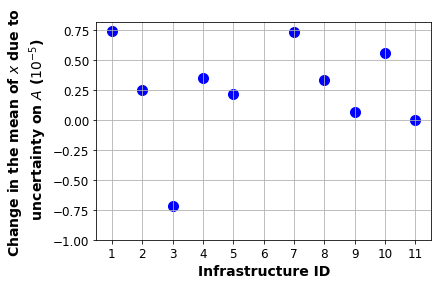

In [18]:
# different before and after including uncertainty
difference_mean_A=(np.mean(x_A_s1, axis=1)-np.mean(x_A_s0, axis=1))*10**5

infrastructure_id=np.linspace(1, 11, num=11)

plt.scatter(infrastructure_id,difference_mean_A,s=100,c='b')
plt.ylim(np.min(np.abs(difference_mean_A))-1,np.max(difference_mean_A)*1.1)

plt.xlabel('Infrastructure ID',fontsize=14,fontweight='bold')
plt.ylabel('Change in the mean of $x$ due to \n uncertainty on $A$ ($10^{-5}$)',fontsize=14,fontweight='bold')
plt.xticks(np.arange(1, 12, step=1),fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
# plt.legend(('$A$','$f$'),loc='best')
plt.savefig("Change_mean_due_to_uncertain_A.pdf",bbox_inches = "tight")

plt.show()


Variance due to uncertainty on $A$

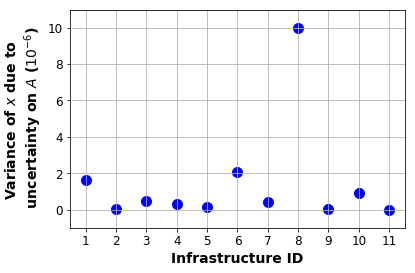

In [19]:
difference_var_A=(np.var(x_A_s1, axis=1)-np.var(x_A_s0, axis=1))*10**6

plt.scatter(infrastructure_id,difference_var_A,s=100,c='b')
plt.ylim(-1,np.max(difference_var_A)*1.1)

plt.xlabel('Infrastructure ID',fontsize=14,fontweight='bold')
plt.ylabel('Variance of $x$ due to \n uncertainty on $A$ ($10^{-6}$)',fontsize=14,fontweight='bold')
plt.xticks(np.arange(1, 12, step=1),fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
# plt.legend(('$A$','$f$'),loc='best')
plt.savefig("var_due_to_uncertain_A.pdf",bbox_inches = "tight")

plt.show()

In [20]:
# print("Difference between x after and before including uncertainty about A",difference)

In [21]:
# # density plot
# for count_plot in range(mat_A.shape[0]):     
# #     plt.boxplot(x_s1[count_plot,:],notch=True)
# #     plt.plot(x_s0[count_plot,:])
#     plt.title('Infrastructure number: %s'%(count_plot+1),fontsize=14,fontweight='bold')

#     plt.hist(x_s1[count_plot,:], bins = int(180/15),normed=True)
#     plt.show()

- The uncertainty on x is not uniform. I personally thought it would be uniform since the relationships are linear (Of course I do not think so now).

- Infrastructure 11 is the most robust to the uncertainty. In fact, this is because elements in row 11 are not subject to uncertainty since they are all zero.

- Among all, infrastructure 4 and 8 are highly sensitive to the uncertainty.

### Q 2.17 Effect of uncertainty on $f$ on $x$

In [22]:
def calculate_x_uncertain_f(scaling_factor):
# # creat empty matirx g that will be used to store the g vector in each realization of mc
    n_sample=10000  # number of samples from the uniform distribution of each x
    mat_A=T_1

    # Matrix S:
    eye = np.identity(mat_A.shape[0])

    # initialize matrix f and x
    f_mc=np.zeros((mat_A.shape[0],1))
    x_mc_f=np.zeros((mat_A.shape[0],n_sample))
    
    for i_sample in range(n_sample):
        # draw a sample of matrix f
        for i in range(f_mc.shape[0]):         
            mean=f[i]
            low=(1-scaling_factor)*mean
            high=(1+scaling_factor)*mean
            f_mc[i]=np.random.uniform(low,high,1)
        # solve for matrix s
        # compute x
        x_mc_f[:,[i_sample]] = np.matmul(S,f_mc)
    return x_mc_f

In [23]:
sf0=0
sf1=0.1
x_sf0=calculate_x_uncertain_f(sf0)
x_sf1=calculate_x_uncertain_f(sf1)

# for count_plot in range(mat_A.shape[0]):     
#     plt.boxplot(x_sf1[count_plot,:],notch=True)
#     plt.plot(x_sf0[count_plot,:])
#     plt.title('Infrastructure number: %s'%(count_plot+1),fontsize=14,fontweight='bold')
# #     plt.xlabel("%s"%(count_plot+1),fontweight='bold',fontsize=12)
#     plt.show()


Histogram of $x$

#### Note: use the commented figure paramters for the figure below

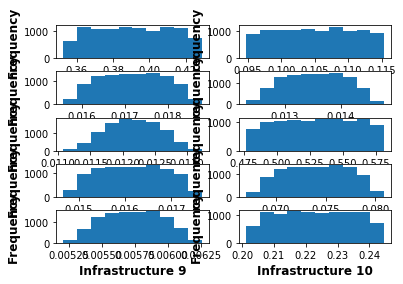

In [24]:
# # figure parameters
# import matplotlib.pylab as pylab
# params = {'legend.fontsize': 'x-large',
#           'figure.figsize': (14, 14),
#          'axes.labelsize': 'x-large',
#          'axes.titlesize':'x-large',
#          'xtick.labelsize':'large',
#          'ytick.labelsize':'large'}
# pylab.rcParams.update(params)
n_row_subplot=5

fig, axs_hist = plt.subplots(n_row_subplot, 2)
 
fig.subplots_adjust(hspace=0.4) # make a little extra space between the subplots
for count_plot in np.arange(0,n_row_subplot,1):     
    axs_hist[count_plot,0].hist(x_sf1[count_plot*2,:])
#     print('Infrastructure number: %s'%(count_plot+1))
    this_ax0=axs_hist[count_plot,0]
    this_ax0.set_xlabel("Infrastructure %s"%(count_plot*2+1),fontweight='bold',fontsize=12)
    this_ax0.set_ylabel("Frequency",fontweight='bold',fontsize=12)
#     this_ax0.yaxis.grid(linestyle="--", color='grey')
    
    axs_hist[count_plot,1].hist(x_sf1[count_plot*2+1,:])
#     axs_hist[count_plot,1].set_xlabel("Infrastructure %s"%(count_plot*2+1),fontweight='bold',fontsize=12)
    this_ax1=axs_hist[count_plot,1]
    this_ax1.set_xlabel("Infrastructure %s"%(count_plot*2+1+1),fontweight='bold',fontsize=12)
    this_ax1.set_ylabel("Frequency",fontweight='bold',fontsize=12)
#     this_ax1.yaxis.grid(linestyle="--", color='grey')

# save figure
plt.savefig("dist_x_uncertain_f.pdf",bbox_inches = "tight")

Change in the mean due to uncertainty on $f$

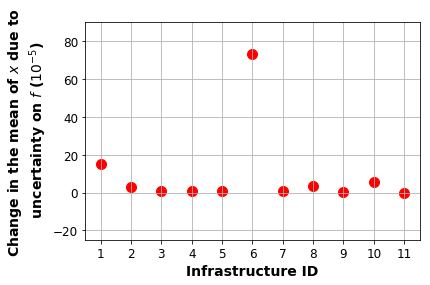

In [25]:
difference_mean_f=(np.mean(x_sf1, axis=1)-np.mean(x_sf0, axis=1))*10**5

plt.scatter(infrastructure_id,difference_mean_f,s=100,c='r')
plt.ylim(-25,90)

plt.xlabel('Infrastructure ID',fontsize=14,fontweight='bold')
plt.ylabel('Change in the mean of $x$ due to \n uncertainty on $f$ ($10^{-5}$)',fontsize=14,fontweight='bold')
plt.xticks(np.arange(1, 12, step=1),fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
# plt.legend(('$A$','$f$'),loc='best')
plt.savefig("Change_mean_due_to_uncertain_f.pdf",bbox_inches = "tight")

plt.show()


Variance due to uncertainty on $f$

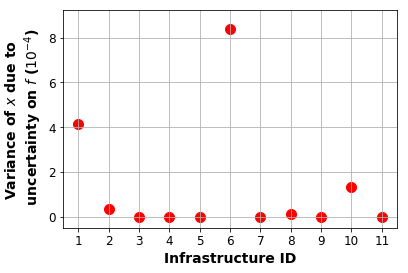

In [26]:
difference_var_f=np.var(x_sf1, axis=1)*10**4

plt.scatter(infrastructure_id,difference_var_f,s=100,c='r')
plt.ylim(-0.5,np.max(difference_var_f)*1.1)

plt.xlabel('Infrastructure ID',fontsize=14,fontweight='bold')
plt.ylabel('Variance of $x$ due to \n uncertainty on $f$ ($10^{-4}$)',fontsize=14,fontweight='bold')
plt.xticks(np.arange(1, 12, step=1),fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
# plt.legend(('$A$','$f$'),loc='best')
plt.savefig("var_due_to_uncertain_f.pdf",bbox_inches = "tight")

plt.show()

According to the change in the mean of $x$, infrastructure 6 an 10 are more sensitive to the uncertainty about $f$.


### Compare the effect of uncertainty on $f$ and $A$ on $x$

In [27]:
# density plot

# for count_plot in range(mat_A.shape[0]):     
# #     plt.boxplot(x_s1[count_plot,:],notch=True)
# #     plt.plot(x_s0[count_plot,:])
#     plt.title('Infrastructure number: %s'%(count_plot+1),fontsize=14,fontweight='bold')

#     plt.hist(x_sf1[count_plot,:],normed=True)
#     plt.show()

### Compare the impact of uncertainty on $f$ and $A$ on $x$.
Compare change in the mean of $x_i$

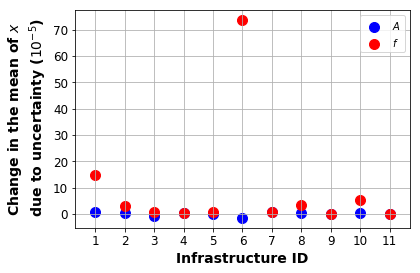

In [28]:
difference_mean_A=(np.mean(x_A_s1, axis=1)-np.mean(x_A_s0, axis=1))*10**5
difference_mean_f=(np.mean(x_sf1, axis=1)-np.mean(x_sf0, axis=1))*10**5

plt.scatter(infrastructure_id,difference_mean_A,s=100,c='b')
plt.scatter(infrastructure_id,difference_mean_f,s=100,c='r')
# plt.ylim(np.min(np.abs(difference_mean_f))*1.05,np.max(difference_mean_f)*1.1)

plt.xlabel('Infrastructure ID',fontsize=14,fontweight='bold')
plt.ylabel('Change in the mean of $x$ \n due to uncertainty ($10^{-5}$)',fontsize=14,fontweight='bold')
plt.xticks(np.arange(1, 12, step=1),fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
plt.legend(('$A$','$f$'),loc='best')

plt.savefig("Decrease_mean_due_to_uncertainty_A_f.pdf",bbox_inches = "tight")

plt.show()


Compare the variance of $x_i$

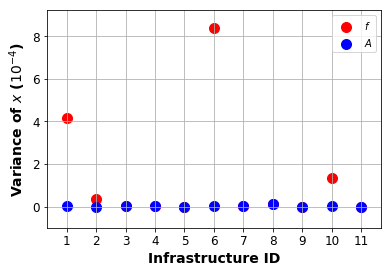

In [29]:
difference_var_A=np.var(x_A_s1, axis=1)*10**4
difference_var_f=np.var(x_sf1, axis=1)*10**4

plt.scatter(infrastructure_id,difference_var_f,s=100,c='r')
plt.scatter(infrastructure_id,difference_var_A,s=100,c='b')
plt.ylim(-1,np.max(difference_var_f)*1.1)

plt.xlabel('Infrastructure ID',fontsize=14,fontweight='bold')
plt.ylabel('Variance of $x$ ($10^{-4}$)',fontsize=14,fontweight='bold')
plt.xticks(np.arange(1, 12, step=1),fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
plt.legend(('$f$','$A$'),loc='best')
plt.savefig("var_x_due_to_uncertainty_A_f.pdf",bbox_inches = "tight")

plt.show()

### Q 2.18
Following the analysis of the previous two questions, rerun the models using the lower
bound of each uncertain parameter or input (i.e., one run with all parameters in A at the lower bound, and
one run with f at the lower bound), and again with the upper bounds of each parameter or input. 

Compare the outputs with what you observed from the pervious questions. Explain what you find and comment
generality of any properties you observe.

#### 2.18.1 Elements of $A$ at lower bound

In [30]:
def calculate_x_low_A(scaling_factor):
# # creat empty matirx g that will be used to store the g vector in each realization of mc
    n_sample=1  # number of samples from the uniform distribution of each x
    mat_A=T_1

    # Matrix S:
    eye = np.identity(mat_A.shape[0])

    # initialize matrix A and x
    mat_A_mc=np.zeros((mat_A.shape[0],n_sample))
    x_mc=np.zeros((mat_A.shape[0],n_sample))


    for i_sample in range(n_sample):

        # draw a sample of matrix A
        mat_A_low=np.zeros((mat_A.shape[0],mat_A.shape[1]))
        for i in range(mat_A.shape[0]):
            for j in range(mat_A.shape[1]):
#                 mean=mat_A[i][j]
                  mat_A_low[i][j]=(1-scaling_factor)*mat_A[i][j]
#                 high=(1+scaling_factor)*mean
#                 mat_A_rand[i][j]=low

        # solve for matrix s
        test_mc = eye - mat_A_low
        S_mc = np.linalg.inv(test_mc)

        # compute x
        x_mc[:,[i_sample]] = np.matmul(S_mc,f)
    return x_mc
# box plot of x to show the range of x_mc
s0=0
s1=0.1
x_s0_low_A=calculate_x_low_A(s0)
x_s1_low_A=calculate_x_low_A(s1)
x_s1_up_A=calculate_x_low_A(-s1)

In [31]:
# results of x_low
# print('x vector calculated based on all lelements in A at the lower bound:\n', x_s1_low_A)
diff_x_s_lowA=x_s1_low_A-x_s0_low_A 
diff_x_s_upA=x_s1_up_A-x_s0_low_A  
# plt.scatter(infrastructure_id,diff_x_s_lowA)
# plt.ylim(-np.max(np.abs(diff_x_s_lowA)),np.max(diff_x_s_lowA))
# plt.show()
# print("Difference between x after and before using the lower bound values in A",diff_x_s1_lowA)

Compare the $x$ obtained by using extreme values in $A$ and the minimum and maximum $x$ obtained by MC

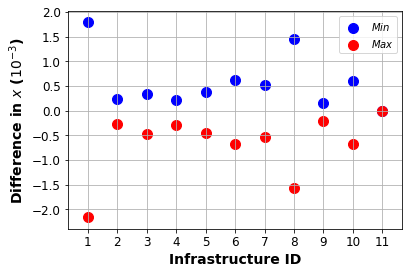

In [71]:
diff_x_min_low_MC_A=np.min(x_A_s1,axis=1)-x_s1_low_A.T
diff_x_max_low_MC_A=np.max(x_A_s1,axis=1)-x_s1_up_A.T

plt.scatter(infrastructure_id,diff_x_min_low_MC_A*1000,s=100,c='b')
plt.scatter(infrastructure_id,diff_x_max_low_MC_A*1000,s=100,c='r')

# plt.ylim(np.min(np.abs(difference_mean_f))*1.05,np.max(difference_mean_f)*1.1)

plt.xlabel('Infrastructure ID',fontsize=14,fontweight='bold')
plt.ylabel('Difference in $x$ ($10^{-3}$)',fontsize=14,fontweight='bold')
plt.xticks(np.arange(1, 12, step=1),fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
plt.legend(('$Min$','$Max$'),loc='best')

plt.savefig("Diff_min_max_A.pdf",bbox_inches = "tight")

plt.show()


### 2.18.2 Elelments of $f$ at lower bound

In [32]:
def calculate_x_low_f(scaling_factor):
# # creat empty matirx g that will be used to store the g vector in each realization of mc
    n_sample=1  # number of samples from the uniform distribution of each x
    mat_A=T_1

    # Matrix S:
    eye = np.identity(mat_A.shape[0])

    # initialize matrix f and x
    f_low=np.zeros((mat_A.shape[0],1))
    x_low_f=np.zeros((mat_A.shape[0],n_sample))
    
    for i_sample in range(n_sample):
        # draw a sample of matrix f
        for i in range(f_low.shape[0]):         
            f_low[i]=(1-scaling_factor)*f[i]
        # solve for matrix s
        # compute x
        x_low_f[:,[i_sample]] = np.matmul(S,f_low)
    return x_low_f
sf0=0
sf1=0.1
x_sf0_low=calculate_x_low_f(sf0)
x_sf1_low=calculate_x_low_f(sf1)
x_sf1_up=calculate_x_low_f(-sf1)

In [33]:
# results of x_low
# print('x vector calculated based on all lelements in f at the lower bound:\n', x_s1_low_A)
diff_x_f_low=x_sf1_low-x_sf0_low
diff_x_f_up=x_sf1_up-x_sf0_low

### 2.18.3 Comparing the impact of lower bound values of $A$ and $f$

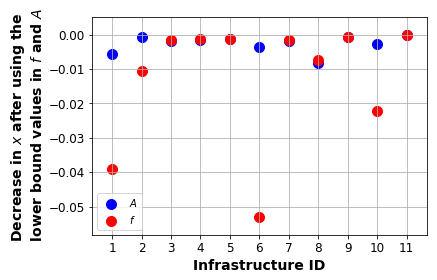

In [34]:
plt.scatter(infrastructure_id,diff_x_s_lowA,s=100,c='b')
plt.scatter(infrastructure_id,diff_x_f_low,s=100,c='r')
plt.ylim(-np.max(np.abs(diff_x_f_low))*1.1,np.max(diff_x_f_low)*1.5+0.005)
plt.xlabel('Infrastructure ID',fontsize=14,fontweight='bold')
plt.ylabel('Decrease in $x$ after using the \n lower bound values in $f$ and $A$',fontsize=14,fontweight='bold')
plt.xticks(np.arange(1, 12, step=1),fontsize=12)
plt.yticks(fontsize=12)
plt.legend(('$A$','$f$'),loc='best')
plt.grid()

# print('Decrease in $x$ after using the \n lower bound values in $f$',diff_x_s1_lowA)
plt.savefig("Decrease_due_to_lower_bound.pdf",bbox_inches = "tight")

plt.show()

From the last two figures, it can be observed that using lower bound values in $f$ leads to larger decrease in $x$

### 2.18.4 Comparing the impact of upper bound values of $A$ and $f$

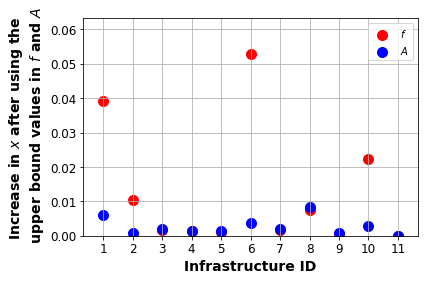

In [35]:
plt.scatter(infrastructure_id,diff_x_f_up,s=100,c='r')
plt.scatter(infrastructure_id,diff_x_s_upA,s=100,c='b')
plt.ylim(np.min(np.abs(diff_x_f_up))*0.8,np.max(diff_x_f_up)*1.1+0.005)
plt.xlabel('Infrastructure ID',fontsize=14,fontweight='bold')
plt.ylabel('Increase in $x$ after using the \n upper bound values in $f$ and $A$',fontsize=14,fontweight='bold')
plt.xticks(np.arange(1, 12, step=1),fontsize=12)
plt.yticks(fontsize=12)
plt.legend(('$f$','$A$'),loc='best')
plt.grid()

plt.savefig("Increase_due_to_lower_bound.pdf",bbox_inches = "tight")

plt.show()

Compare the $x$ obtained by using extreme values in $f$ and the minimum and maximum $x$ obtained by MC

In [56]:
np.min(x_sf1,axis=1)

array([0.35268279, 0.09470956, 0.01556754, 0.01230926, 0.01107902,
       0.47644564, 0.01467038, 0.06701746, 0.00521009, 0.20117754,
       0.        ])

In [57]:
x_sf1_low

array([[0.35178293],
       [0.09453282],
       [0.0154568 ],
       [0.01217751],
       [0.01094419],
       [0.47627574],
       [0.01453396],
       [0.06661512],
       [0.00516053],
       [0.20082422],
       [0.        ]])

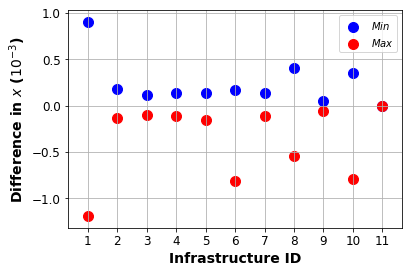

In [70]:
diff_x_min_low_MC_f=np.min(x_sf1,axis=1)-x_sf1_low.T
diff_x_max_low_MC_f=np.max(x_sf1,axis=1)-x_sf1_up.T

plt.scatter(infrastructure_id,diff_x_min_low_MC_f*1000,s=100,c='b')
plt.scatter(infrastructure_id,diff_x_max_low_MC_f*1000,s=100,c='r')

# plt.ylim(np.min(np.abs(difference_mean_f))*1.05,np.max(difference_mean_f)*1.1)

plt.xlabel('Infrastructure ID',fontsize=14,fontweight='bold')
plt.ylabel('Difference in $x$ ($10^{-3}$)',fontsize=14,fontweight='bold')
plt.xticks(np.arange(1, 12, step=1),fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
plt.legend(('$Min$','$Max$'),loc='best')

plt.savefig("Diff_min_max_f.pdf",bbox_inches = "tight")

plt.show()

### Q 2.19
If the total level of degradation to air fuel & petroleum grid, TLC wireless, and finance
cannot be greater than 20%, 30%, and 35%, respectively, what is the maximum initial impact fmax that the
system can absorb? 

#### Numerical solution:

In [36]:
from cvxopt import matrix
from cvxopt import solvers
import numpy as np

In [37]:
# online example of using cvxopt for a LP problem: https://cvxopt.org/examples/tutorial/lp.html

# objective: min. c^T*X
# s.t. Ax<=b and x >=0

#----------------------------------------------
# objective func: f_max. f_max=sum(f_vector)
# f=inv(S)*X
# denote inv(S) by IS
# f_sum=f_1+f_2+...+f_n= (IS_11+IS_21+...+IS_n1)*x_n+...+(IS_n1+IS_n2+...+IS_nn)*x_n

# c matrix!
S_inv=np.linalg.inv(S)
c=S_inv.sum(axis=1, dtype=np.float)
c=-c  # max to min

#-------------------------------------------------
# constraints: # x_8<=0.2, x_3<=0.3, x_7<=0.35

# 1*x3+ 0* x7+0*x8<=0.3
# 0*x3+ 1* x7+0*x8<=0.35
# 0*x3+ 0* x7+1*x8<=0.20
# x_i<=1， if i is not in {3,7,8}

n_x=11
# n_const=n_x

# A=np.zeros((n_const,n_x),dtype=np.float) # each row of A represents a contraint
# A[0,0]=1
# A[1,6]=1
# A[2,7]=1
# for i in range(11):
#     j=i+3
#     A[j,i]=-1
# # A=A.T

A_up=np.eye(n_x)
A_down=-np.eye(n_x)
A=np.concatenate((A_up, A_down,-S_inv), axis=0)

b_x_up=np.array([1,1,0.3,1,1,1,0.35,0.2,1,1,1], dtype=np.float)
b_x_down=np.zeros(n_x, dtype=float)
b_f=np.zeros(n_x, dtype=float)
b=np.concatenate((b_x_up,b_x_down,b_f))

# construct A, B, C matrices first as numpy arrays
# values need to be floats, or array needs to be specified as data type float (dtype=np.float)
# A = np.array([[4, 5, 1, -1, 0], [6, 3, 1, 0, -1]], dtype=np.float)

# A = A.T # transpose A so it is a tall skinny matrix
# b = np.array([22, 15, 6, 0, 0], dtype=np.float)
# c = np.array([-10, -12], dtype=np.float)

Amatrix = matrix(A)
print("A:\n", Amatrix)
# b and c matrices do not need to be transposed because they are vectors (single [ ], not nested)
#  and interpreted flexibly as either row or column vectors
# -- if you put nested brackets around b values and re-evaluate, notice that the program will break
bmatrix = matrix(b)
print("b:\n", bmatrix)
cmatrix = matrix(c)
print("c:\n", cmatrix)

A:
 [ 1.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[ 0.00e+00  1.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[ 0.00e+00  0.00e+00  1.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[ 0.00e+00  0.00e+00  0.00e+00  1.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  1.00e+00  0.00e+00  0.00e+00 ... ]
[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  1.00e+00  0.00e+00 ... ]
[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  1.00e+00 ... ]
[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[-1.00e+00 -0.00e+00 -0.00e+00 -0.00e+00 -0.00e+00 -0.00e+00 -0.00e+00 ... ]
[-0.00e+00 -1.00e+00 -0.00e+00 -0.00e+00 -0.00e+00 -0.00e+00 -0.00e+00 .

In [38]:
solSimplex = solvers.lp(cmatrix,Amatrix,bmatrix, solver='glpk')#simplex solver
print('our solution is:',solSimplex['status'])

our solution is: optimal


In [39]:
print('Summary of solution:')
solSimplex

Summary of solution:


{'status': 'optimal',
 'x': <11x1 matrix, tc='d'>,
 's': <33x1 matrix, tc='d'>,
 'y': <0x1 matrix, tc='d'>,
 'z': <33x1 matrix, tc='d'>,
 'primal objective': -4.364209317841036,
 'dual objective': -4.364209317841019,
 'gap': -4.4880377902342844e-15,
 'relative gap': -1.0283736327419112e-15,
 'primal infeasibility': 0.0,
 'dual infeasibility': 9.642609165724476e-15,
 'primal slack': -6.661338147750939e-16,
 'dual slack': -0.0,
 'residual as primal infeasibility certificate': None,
 'residual as dual infeasibility certificate': None}

In [40]:
# extract the solution x-values
#xConeLP = solConeLP['x']
xSimplex = solSimplex['x']#our x values at optimality
#print(xConeLP)
print('optimal x=:\n',xSimplex)

#our cost functiion at optimality
print('objective function at optimality:\n',solSimplex['primal objective'])
#Note that the cost we are after was actually a maximization problem, we converted it to a minimum problem to run the solver
#the true benefit is -solSimplex['primal objective']
#print("dif=:",xSimplex-xConeLP)

#recast everything back to numpy

x=np.array(xSimplex)

A=np.array(Amatrix)
b=np.array(bmatrix)

#verify the feasibility of the point
print('constraint satisfied at equality at optimality:\n',A.dot(x)-b==0)

optimal x=:
 [ 4.36e-01]
[ 1.71e-01]
[ 4.44e-02]
[ 3.64e-02]
[ 1.00e+00]
[ 1.00e+00]
[ 3.50e-01]
[ 2.00e-01]
[ 8.59e-01]
[ 1.00e+00]
[ 1.00e+00]

objective function at optimality:
 -4.364209317841036
constraint satisfied at equality at optimality:
 [[False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]]


In [41]:
S_inv=np.linalg.inv(S)
f_opt=np.dot(S_inv,x)
print(f_opt)
print(np.sum(f_opt))

[[ 5.55111512e-17]
 [-3.72965547e-17]
 [-2.98372438e-16]
 [-8.32667268e-17]
 [ 9.46898124e-01]
 [ 9.35747152e-01]
 [ 2.99061380e-01]
 [ 3.60822483e-16]
 [ 8.35339364e-01]
 [ 8.99917139e-01]
 [ 1.00000000e+00]]
4.916963159475481


### Then end of part I